# Prueba tecnica

In [1]:
import pandas as pd 
import numpy as np

In [2]:
file = "Downloads/prueba/Reactive_results.xlsx"
data= pd.read_excel(file)

In [3]:
data.head()

,Case,Scenario,Variation,Generator,Power factor,PF Type,Element,Parameter,Value,Type
0,2026,2026_DzMD_GzMD_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.90,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,60.1058,ElmLne
1,2026,2026_DzMD_GzMD_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.91,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,60.1243,ElmLne
2,2026,2026_DzMD_GzMD_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.92,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,60.1418,ElmLne
3,2026,2026_DzMD_GzMD_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.93,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,60.1586,ElmLne
4,2026,2026_DzMD_GzMD_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.94,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,60.1749,ElmLne


In [4]:
data.columns.values.tolist()

['Case',
 'Scenario',
 'Variation',
 'Generator',
 'Power factor',
 'PF Type',
 'Element',
 'Parameter',
 'Value',
 'Type']

In [5]:
data_scenario = data[data['Scenario']== "2031_DzMN_GzMN_Dp00_Gp00"] 
data_parameter = data_scenario[data_scenario['Parameter'] == "m:P:bus1 in MW"] 
data_element = data_parameter[data_parameter['Element'] == "Dorada - Magdalena 115 kV"]

In [6]:
data_element.head()

,Case,Scenario,Variation,Generator,Power factor,PF Type,Element,Parameter,Value,Type
21128,2031,2031_DzMN_GzMN_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.90,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,30.9612,ElmLne
21129,2031,2031_DzMN_GzMN_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.91,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,30.9833,ElmLne
21130,2031,2031_DzMN_GzMN_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.92,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,31.0038,ElmLne
21131,2031,2031_DzMN_GzMN_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.93,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,31.0231,ElmLne
21132,2031,2031_DzMN_GzMN_Dp00_Gp00,A1-Pensilvania 33 kV,All generators,0.94,cap,Dorada - Magdalena 115 kV,m:P:bus1 in MW,31.0415,ElmLne


In [7]:
columnas_import = data_element[["Variation", "PF Type", "Power factor", "Value"]]
columnas_import.head()

,Variation,PF Type,Power factor,Value
21128,A1-Pensilvania 33 kV,cap,0.90,30.9612
21129,A1-Pensilvania 33 kV,cap,0.91,30.9833
21130,A1-Pensilvania 33 kV,cap,0.92,31.0038
21131,A1-Pensilvania 33 kV,cap,0.93,31.0231
21132,A1-Pensilvania 33 kV,cap,0.94,31.0415


In [8]:
group_data = columnas_import.groupby(["Variation", "PF Type", "Power factor"]).first().reset_index()
group_data.head()


,Variation,PF Type,Power factor,Value
0,A1-Pensilvania 33 kV,cap,0.90,30.961220
1,A1-Pensilvania 33 kV,cap,0.91,30.983332
2,A1-Pensilvania 33 kV,cap,0.92,31.003791
3,A1-Pensilvania 33 kV,cap,0.93,31.023065
4,A1-Pensilvania 33 kV,cap,0.94,31.041529


In [9]:
distinct_variations = data_element["Variation"].unique()
print(distinct_variations)

['A1-Pensilvania 33 kV' 'A2- Bolivia 33 kV' 'A3 -Florencia 33 kV'
 'Caso Base']


In [10]:
variations = []

for key in distinct_variations:
    variation_filtrada = group_data[group_data["Variation"] == key].drop(columns = ["Variation"])
    variation_renombrada = variation_filtrada.rename(columns = {"Value": key})
    variations.append(variation_renombrada)


In [11]:
result = variations[0]
for variation in variations[1:]:
    df1 = result
    df2 = variation
    result = df1.merge(df2,on=["PF Type", "Power factor"],how='inner')



In [12]:
result = result.groupby(["PF Type", "Power factor"]).first()

In [13]:
result.head()

A1-Pensilvania 33 kV  A2- Bolivia 33 kV  \
PF Type Power factor                                            
cap     0.90                     30.961220          30.913912   
        0.91                     30.983332          30.934698   
        0.92                     31.003791          30.953853   
        0.93                     31.023065          30.971853   
        0.94                     31.041529          30.989070   

                      A3 -Florencia 33 kV  Caso Base  
PF Type Power factor                                  
cap     0.90                    31.085785  30.653101  
        0.91                    31.103201  30.653101  
        0.92                    31.119856  30.653101  
        0.93                    31.135961  30.653101  
        0.94                    31.151720  30.653101

In [14]:
result.to_excel("Downloads/prueba/resultado.xlsx")

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
group_data = group_data.reset_index()
group_data["Power factor"] = np.where(group_data["PF Type"] == "ind", -group_data["Power factor"],group_data["Power factor"])

In [17]:
graphic_data = group_data[["Variation", "Power factor", "Value"]]


A1-Pensilvania 33 kV
A2- Bolivia 33 kV
A3 -Florencia 33 kV
Caso Base


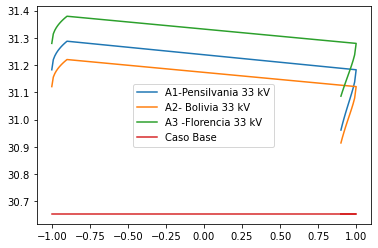

In [18]:
for key in distinct_variations:
    fila = graphic_data[graphic_data["Variation"] == key]
    x = fila["Power factor"].to_numpy()
    y = fila["Value"].to_numpy()
    plt.plot(x, y)
    print(key)
plt.legend(distinct_variations)
plt.show()